In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle
from os.path import join

In [2]:
path = '../Data'

In [3]:
df = pd.read_pickle(join(path, 'Clean Data', 'final_dataset.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,...,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spender,avg_freq,order_freq,cost_per_order
0,2398795,1,2,3,7,15.0,196,1,Soda,7,...,Mid-range product,2nd Least Busy Day,Average Orders,10,New customer,5.959524,Low spender,20.0,Reguler Customer,25.1
1,2398795,1,2,3,7,15.0,12427,1,Original Beef Jerky,19,...,Low-range product,2nd Least Busy Day,Average Orders,10,New customer,5.959524,Low spender,20.0,Reguler Customer,25.1
2,2398795,1,2,3,7,15.0,26088,1,Aged White Cheddar Popcorn,19,...,Low-range product,2nd Least Busy Day,Average Orders,10,New customer,5.959524,Low spender,20.0,Reguler Customer,25.1
3,2398795,1,2,3,7,15.0,10258,0,Pistachios,19,...,Low-range product,2nd Least Busy Day,Average Orders,10,New customer,5.959524,Low spender,20.0,Reguler Customer,25.1
4,2398795,1,2,3,7,15.0,13032,0,Cinnamon Toast Crunch,14,...,Low-range product,2nd Least Busy Day,Average Orders,10,New customer,5.959524,Low spender,20.0,Reguler Customer,25.1


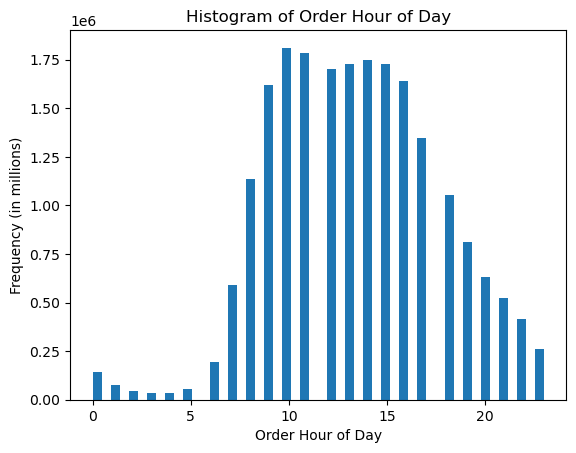

In [9]:
# Create a histogram for Order Hour of Day Column
bar = df['order_hour_of_day'].plot.hist(bins=50)
plt.title("Histogram of Order Hour of Day")
plt.xlabel("Order Hour of Day")
plt.ylabel("Frequency (in millions)")
path = '../Analysis'
filename = os.path.join(path, 'Histogram_Order_Hour_of_Day.png') 
bar.figure.savefig(filename)   
plt.show()  

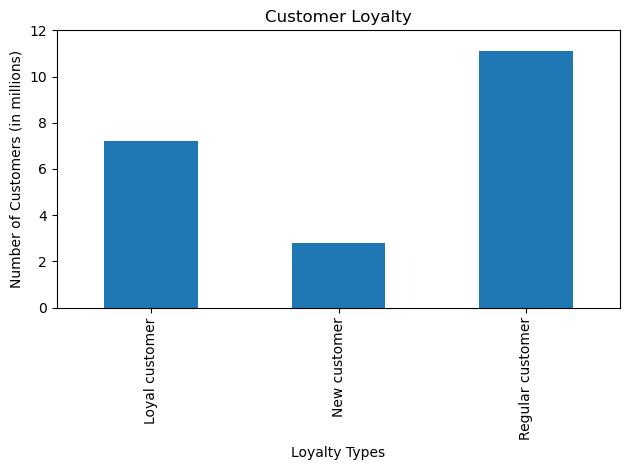

In [26]:
# Create bar chart for Loyalty Flag
bar = df['loyalty_flag'].value_counts().sort_index().plot.bar()
plt.title("Customer Loyalty")
plt.xlabel("Loyalty Types")
plt.ylabel("Number of Customers (in millions)")
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(plt.yticks()[0], [f'{int(tick/1e6):,}' for tick in plt.yticks()[0]])
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Customer_Loyalty.png') 
bar.figure.savefig(filename)   
plt.show() 

In [11]:
# Creating a data set using only the prices and order hour of day columns
df2 = df[['prices', 'order_hour_of_day']]

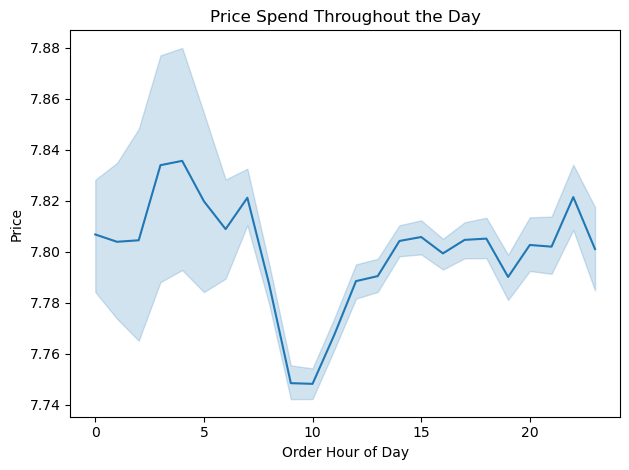

In [27]:
#Creating the line graph
line = sns.lineplot(data=df2, x='order_hour_of_day', y='prices')
plt.title('Price Spend Throughout the Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Price')
plt.tight_layout()
path = r'C:\Users\lisaa\Instacart Project\Analysis'
filename = os.path.join(path, 'Price_Spend_Through_Day.png')   
plt.savefig('Price_Spend_Through_Day.png')
plt.show()

In [14]:
# creating data set using only the age and number of dependents columns
df3 = df[['Age', 'n_dependants']]

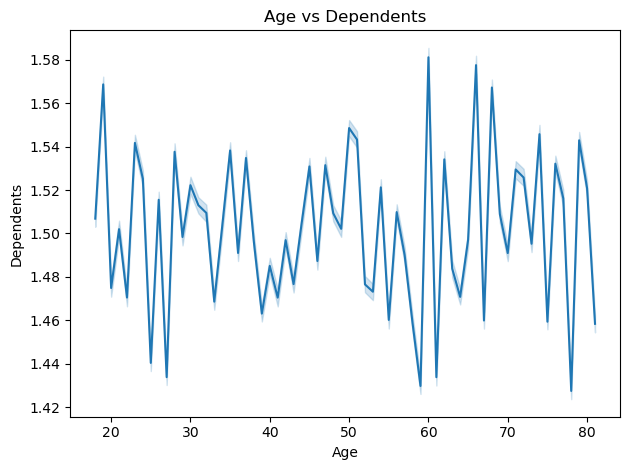

In [28]:
# creating line graph to compare Age to number of Dependents
line = sns.lineplot(data=df3, x='Age', y='n_dependants')
plt.title('Age vs Dependents')
plt.xlabel('Age')
plt.ylabel('Dependents')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Age vs. Dependents.png')   
plt.savefig(filename)
plt.show()

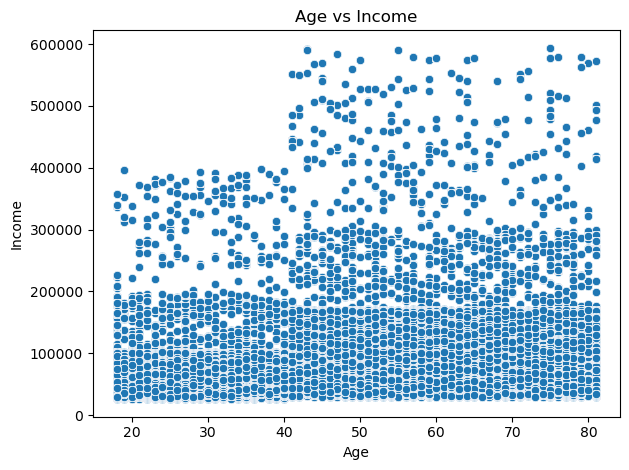

In [29]:
# Creating a scatterplot comparing age vs. income
sns.scatterplot(x = 'Age', y='income', data = df)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Age_vs._Income.png')   
plt.savefig(filename)
plt.show()

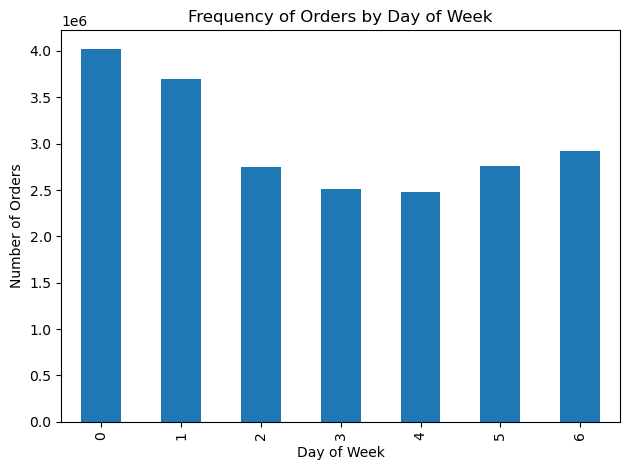

In [30]:
# Creating graph to show frequency of orders throughout the week
df['order_dow'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path,'Orders by Day of Week.png')
plt.savefig(filename)
plt.show()

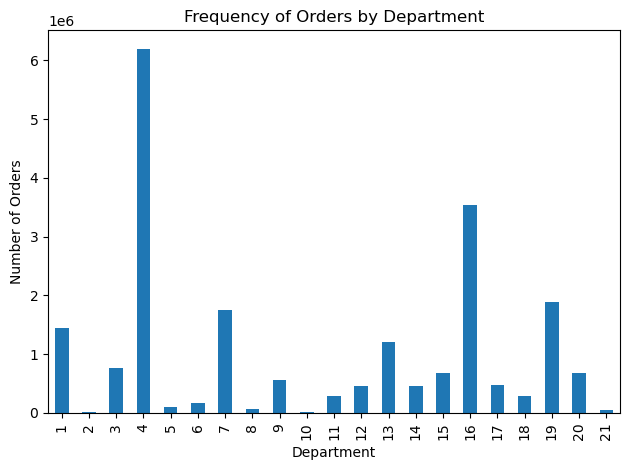

In [31]:
# Creating graph to show frequency of orders by department
df['department_id'].value_counts().sort_index().plot.bar()
plt.title('Frequency of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path,'Orders by Department.png')
plt.savefig(filename)
plt.show()

In [21]:
# grouping the user_id column with loyalty_flag
loyalty_counts = df.groupby('loyalty_flag')['user_id'].nunique()

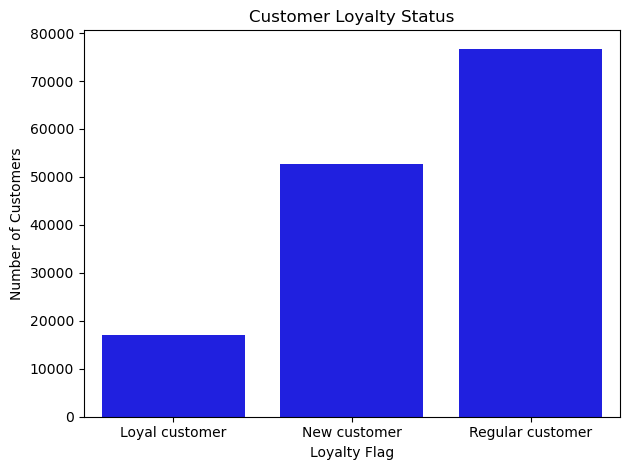

In [22]:
# Creating graph to show customer loyalty status
sns.barplot(x=loyalty_counts.index, y= loyalty_counts.values, color= 'blue')
plt.title('Customer Loyalty Status')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path,'Customer Loyalty Status.png')
plt.savefig('Customer Loyalty Status.png')
plt.show()

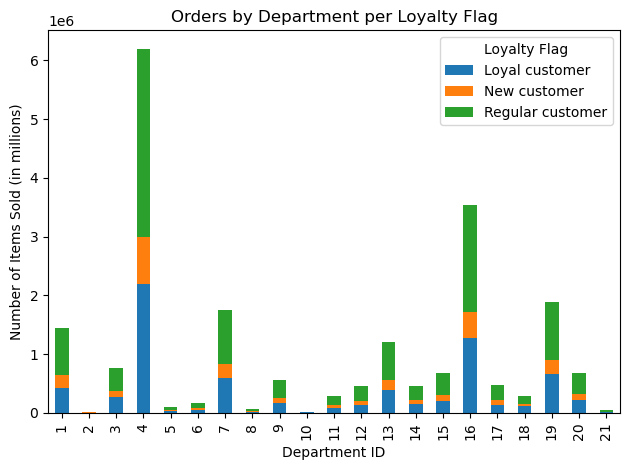

In [32]:
# grouping the department_id and loyalty_flag to create a stacked bar chart
grouped = df.groupby(['department_id', 'loyalty_flag']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='department_id', columns='loyalty_flag',values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Orders by Department per Loyalty Flag')
plt.xlabel('Department ID')
plt.ylabel('Number of Items Sold (in millions)')
plt.tight_layout()
plt.legend(title='Loyalty Flag')
path = '../Analysis'
filename = os.path.join(path,'Orders by Department per Loyalty Flag.png')
plt.savefig(filename)
plt.show()

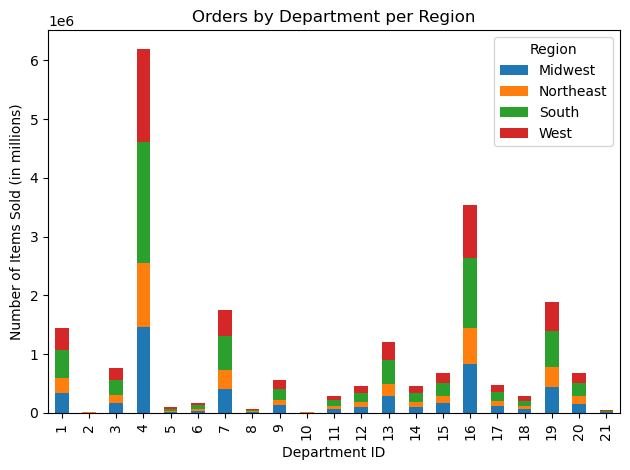

In [33]:
# grouping the department_id and region to create a stacked bar chart
region = df.groupby(['department_id', 'region']).size().reset_index(name='count')
pivot_df = region.pivot(index='department_id', columns='region',values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Orders by Department per Region')
plt.xlabel('Department ID')
plt.ylabel('Number of Items Sold (in millions)')
plt.tight_layout()
plt.legend(title='Region')
path = '../Analysis'
filename = os.path.join(path,'Orders by Department per Region.png')
plt.savefig(filename)
plt.show()

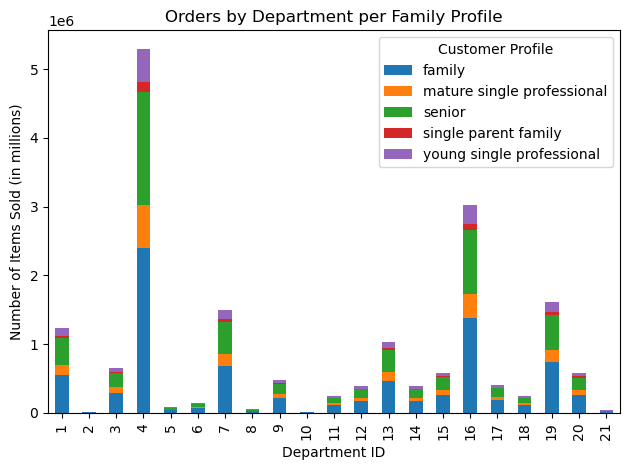

In [35]:
# grouping the department_id and  Profile to create a stacked bar chart- excluding the unprofiled value
filtered_df = df[df['profile'] != 'unprofiled']
family = filtered_df.groupby(['department_id', 'profile']).size().reset_index(name='count')
pivot_df = family.pivot(index='department_id', columns='profile', values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Orders by Department per Family Profile')
plt.xlabel('Department ID')
plt.ylabel('Number of Items Sold (in millions)')
plt.tight_layout()
plt.legend(title='Customer Profile')
path = '../Analysis'
filename = os.path.join(path, 'Orders by Department per Customer Profile.png')  # Added .png to filename
plt.savefig(filename)
plt.show()

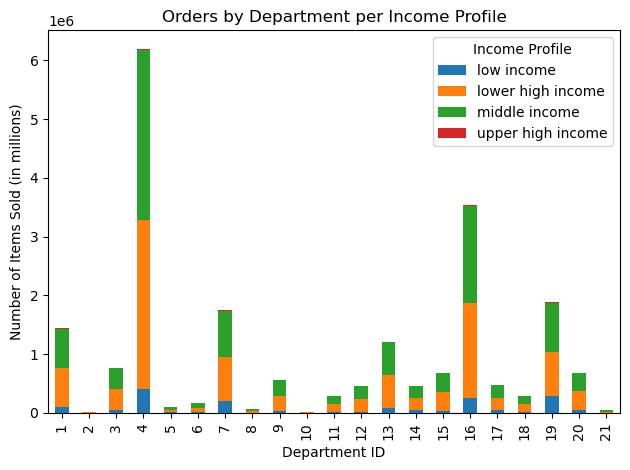

In [37]:
# grouping the department_id and Income Profile to create a stacked bar chart
income = df.groupby(['department_id', 'income_profile']).size().reset_index(name='count')
pivot_df = income.pivot(index='department_id', columns='income_profile',values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Orders by Department per Income Profile')
plt.xlabel('Department ID')
plt.ylabel('Number of Items Sold (in millions)')
plt.tight_layout()
plt.legend(title='Income Profile')
path = '../Analysis'
filename = os.path.join(path, 'Orders by Department per Income Profile.png')  
plt.savefig(filename)
plt.show()

In [39]:
# creating graph to show prices over the week
df4 =df[['order_dow', 'prices']]

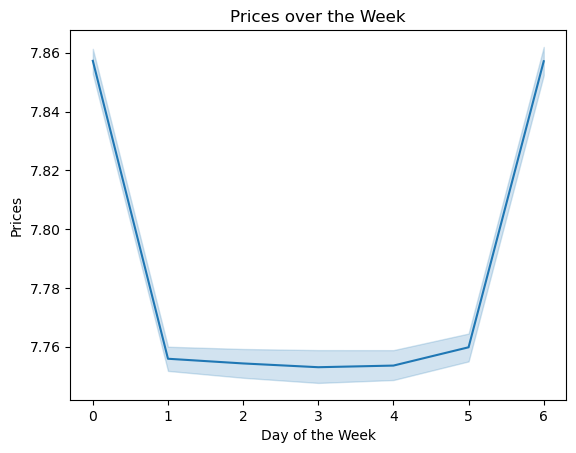

In [40]:
line = sns.lineplot(data = df4, x = 'order_dow', y = 'prices')
plt.xlabel('Day of the Week')
plt.ylabel('Prices')
plt.title('Prices over the Week')
path = '../Analysis'
filename = os.path.join(path, 'Prices over the Week.png')  
plt.savefig(filename)
plt.show()

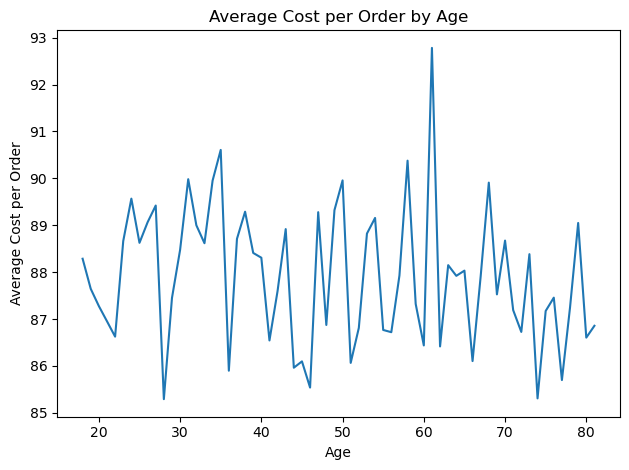

In [41]:
# Creating line graph to show average cost per order by age
avg_cost_per_order = df.groupby('Age')['cost_per_order'].mean().reset_index()
plt.plot(avg_cost_per_order['Age'], avg_cost_per_order['cost_per_order'])
plt.title('Average Cost per Order by Age')
plt.xlabel('Age')
plt.ylabel('Average Cost per Order')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Average Cost per Order.png')  
plt.savefig(filename)
plt.show()

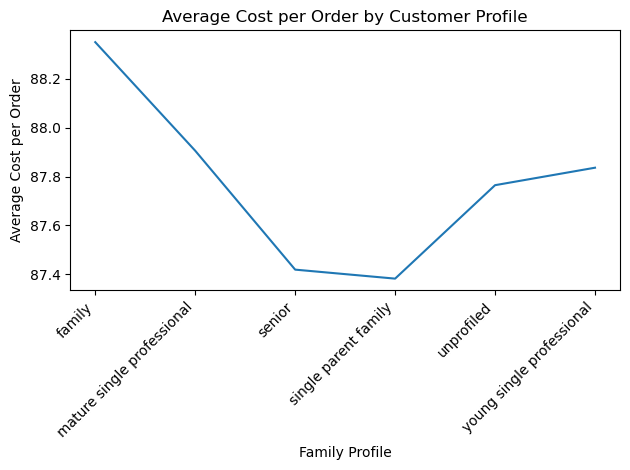

In [44]:
# Creating line graph to show average cost per order by Family Profile
avg_cost_per_order = df.groupby('profile')['cost_per_order'].mean().reset_index()
plt.plot(avg_cost_per_order['profile'], avg_cost_per_order['cost_per_order'])
plt.title('Average Cost per Order by Customer Profile')
plt.xlabel('Family Profile')
plt.ylabel('Average Cost per Order')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and right-align them
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Average Cost per Order by Customer Profile.png')  
plt.savefig(filename)
plt.show()

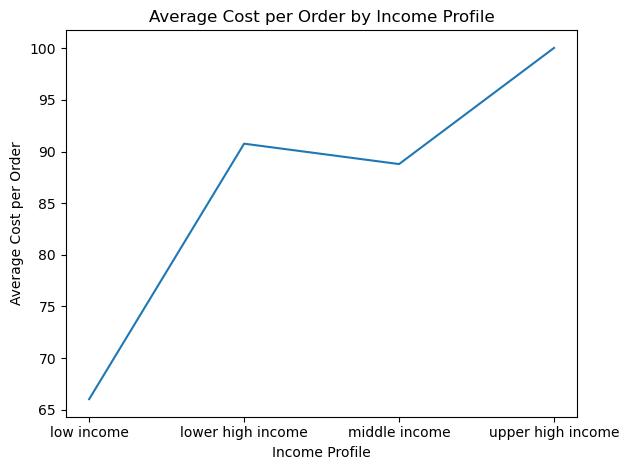

In [45]:
# Creating line graph to show average cost per order by Income Profile
avg_cost_per_order = df.groupby('income_profile')['cost_per_order'].mean().reset_index()
plt.plot(avg_cost_per_order['income_profile'], avg_cost_per_order['cost_per_order'])
plt.title('Average Cost per Order by Income Profile')
plt.xlabel('Income Profile')
plt.ylabel('Average Cost per Order')
plt.tight_layout()
path = '../Analysis'
filename = os.path.join(path, 'Average Cost per Order by Income Profile.png')  
plt.savefig(filename)
plt.show()

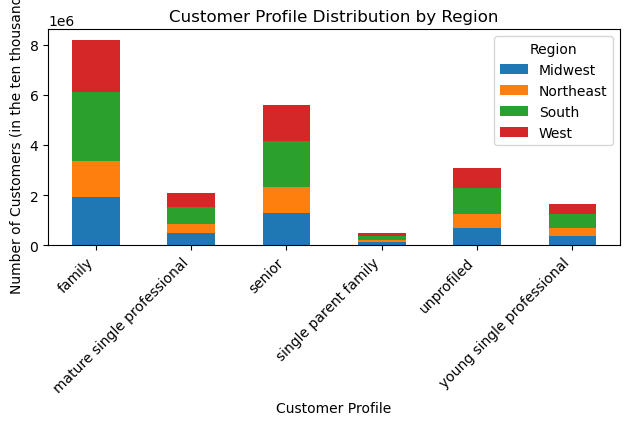

In [47]:
# Creating a stacked bar chart to show Family Profile Distribution by Region
grouped = df.groupby(['profile', 'region']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='profile', columns='region',values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Customer Profile Distribution by Region')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers (in the ten thousands)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and right-align them
plt.legend(title='Region')
path = '../Analysis'
filename = os.path.join(path, 'Customer Profile Distribution by Region.png')  
plt.savefig(filename)
plt.show()

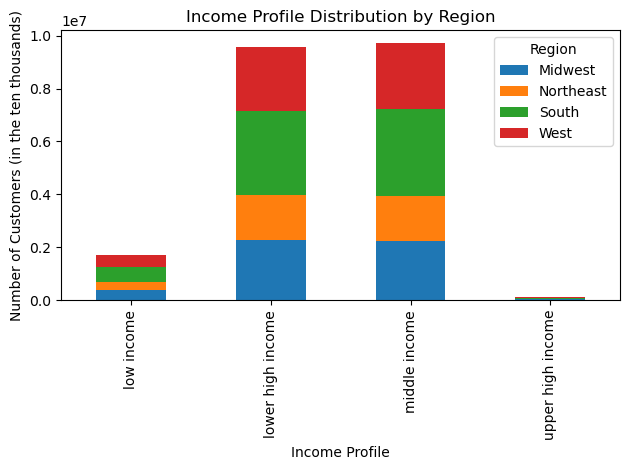

In [48]:
# Creating a stacked bar chart to show Income Profile Distribution by Region
grouped = df.groupby(['income_profile', 'region']).size().reset_index(name='count')
pivot_df = grouped.pivot(index='income_profile', columns='region',values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True)
plt.title('Income Profile Distribution by Region')
plt.xlabel('Income Profile')
plt.ylabel('Number of Customers (in the ten thousands)')
plt.tight_layout()
plt.legend(title='Region')
path = '../Analysis'
filename = os.path.join(path, 'Income Profile Distribution by Region.png')  
plt.savefig(filename)
plt.show()